# 전이학습(EfficientNetB0)

Found 324 images belonging to 2 classes.
Found 80 images belonging to 2 classes.
16705208/16705208 [==============================] - 0s 0us/step


Epoch 1/20
10/10 [==============================] - 127s 7s/step - loss: 0.3112 - accuracy: 0.8596 - val_loss: 1.2525 - val_accuracy: 0.2500
Epoch 2/20
10/10 [==============================] - 10s 956ms/step - loss: 0.0373 - accuracy: 0.9897 - val_loss: 1.3191 - val_accuracy: 0.2812
Epoch 3/20
10/10 [==============================] - 11s 1s/step - loss: 0.0667 - accuracy: 0.9726 - val_loss: 1.3379 - val_accuracy: 0.2656
Epoch 4/20
10/10 [==============================] - 12s 1s/step - loss: 0.0253 - accuracy: 0.9932 - val_loss: 1.5677 - val_accuracy: 0.2188
Epoch 5/20
10/10 [==============================] - 13s 1s/step - loss: 0.0429 - accuracy: 0.9897 - val_loss: 1.7563 - val_accuracy: 0.2031
Epoch 6/20
10/10 [==============================] - 10s 1s/step - loss: 0.0131 - accuracy: 0.9966 - val_loss: 1.4957 - val_accuracy: 0.2344
Epoch 7/20
10/10 [==============================] - 11s 1s/step - loss: 0.0039 - accuracy: 1.0000 - val_loss: 1.2293 - val_accuracy: 0.2656
Epoch 8/20
10/10

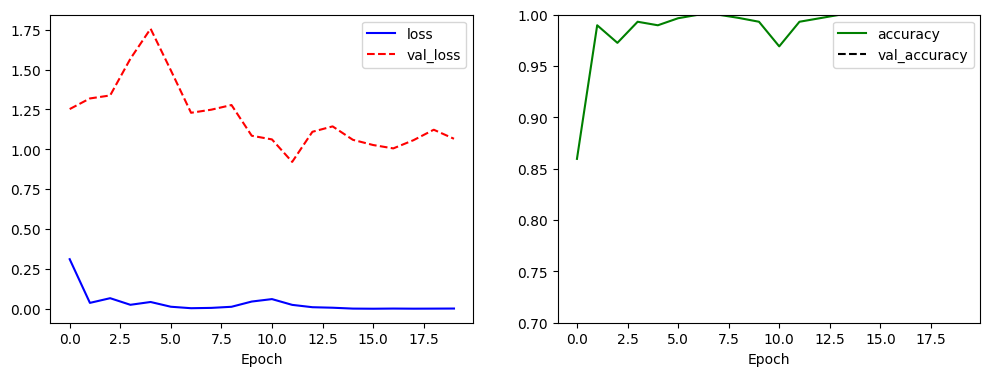

In [2]:
# 필요한 라이브러리를 임포트합니다.1ㅁ
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint
import matplotlib.pyplot as plt
import numpy as np
from keras.preprocessing import image
import os
import time

# 데이터셋의 경로를 설정합니다.
train_dir = '/content/drive/MyDrive/Colab Notebooks/10.cj_project/datasets/img_cls/fm_img/train'
test_dir = '/content/drive/MyDrive/Colab Notebooks/10.cj_project/datasets/img_cls/fm_img/test'

# 이미지 데이터를 불러올 때 적용할 전처리 설정을 정의합니다.
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=1,
                                   validation_split=0.2) # validation set을 위해 20%의 데이터를 분리합니다.

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(224, 224),
                                                    batch_size=16,
                                                    class_mode='binary',
                                                    subset='training')

validation_generator = train_datagen.flow_from_directory(train_dir,
                                                         target_size=(224, 224),
                                                         batch_size=16,
                                                         class_mode='binary',
                                                         subset='validation')

# 전이학습 모델(EfficientNetB0)을 불러오고, 새로운 분류 층을 추가합니다.
base_model = EfficientNetB0(weights='imagenet', include_top=False)
x = base_model.output
x = GlobalAveragePooling2D()(x)
predictions = Dense(1, activation='sigmoid')(x)
model = Model(inputs=base_model.input, outputs=predictions)

# 모델을 컴파일합니다.
model.compile(optimizer=Adam(lr=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

# 모델 학습을 진행합니다.
history = model.fit(train_generator,
                    steps_per_epoch=train_generator.samples // train_generator.batch_size,
                    validation_data=validation_generator,
                    validation_steps=validation_generator.samples // validation_generator.batch_size,
                    epochs=20)

# 학습 결과(loss, accuracy)를 그래프로 시각화합니다.
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], 'g-', label='accuracy')
plt.plot(history.history['val_accuracy'], 'k--', label='val_accuracy')
plt.xlabel('Epoch')
plt.ylim(0.7, 1)
plt.legend()

plt.show()

Found 324 images belonging to 2 classes.
Found 80 images belonging to 2 classes.


9406464/9406464 [==============================] - 0s 0us/step


Epoch 1/20
20/20 [==============================] - 44s 559ms/step - loss: 0.2483 - accuracy: 0.9188 - val_loss: 23.9070 - val_accuracy: 0.2500
Epoch 2/20
20/20 [==============================] - 11s 533ms/step - loss: 0.1471 - accuracy: 0.9643 - val_loss: 43.4342 - val_accuracy: 0.2500
Epoch 3/20
20/20 [==============================] - 12s 591ms/step - loss: 0.0711 - accuracy: 0.9870 - val_loss: 53.9687 - val_accuracy: 0.2500
Epoch 4/20
20/20 [==============================] - 10s 502ms/step - loss: 0.0514 - accuracy: 0.9935 - val_loss: 57.4935 - val_accuracy: 0.2500
Epoch 5/20
20/20 [==============================] - 11s 539ms/step - loss: 0.0690 - accuracy: 0.9903 - val_loss: 54.4880 - val_accuracy: 0.2500
Epoch 6/20
20/20 [==============================] - 10s 511ms/step - loss: 0.0676 - accuracy: 0.9875 - val_loss: 47.7526 - val_accuracy: 0.2500


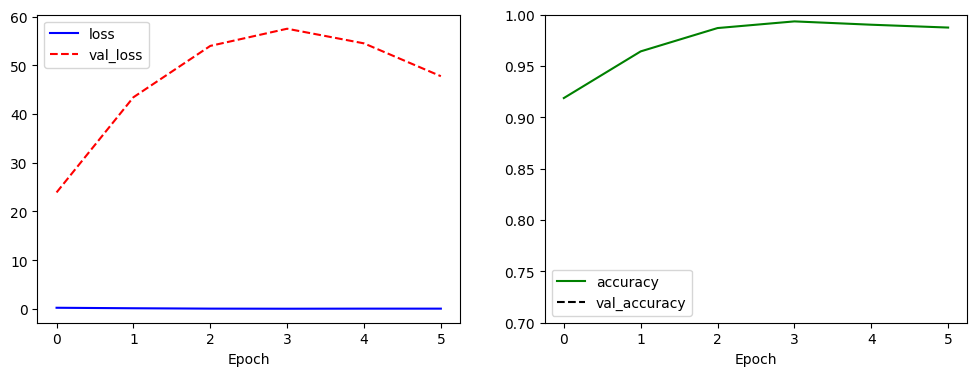

Found 404 images belonging to 2 classes.
Epoch 1/10
25/25 [==============================] - ETA: 0s - loss: 0.0436

25/25 [==============================] - 7s 196ms/step - loss: 0.0436
Epoch 2/10
25/25 [==============================] - ETA: 0s - loss: 0.0300

25/25 [==============================] - 6s 248ms/step - loss: 0.0300
Epoch 3/10
25/25 [==============================] - ETA: 0s - loss: 0.0231

25/25 [==============================] - 5s 210ms/step - loss: 0.0231
Epoch 4/10
25/25 [==============================] - ETA: 0s - loss: 0.0192

25/25 [==============================] - 6s 257ms/step - loss: 0.0192
Epoch 5/10
25/25 [==============================] - ETA: 0s - loss: 0.0171

25/25 [==============================] - 5s 209ms/step - loss: 0.0171
Epoch 6/10
25/25 [==============================] - ETA: 0s - loss: 0.0159

25/25 [==============================] - 6s 243ms/step - loss: 0.0159
Epoch 7/10
25/25 [==============================] - ETA: 0s - loss: 0.0149

25/25 [==============================] - 5s 200ms/step - loss: 0.0149
Epoch 8/10
25/25 [==============================] - ETA: 0s - loss: 0.0139

25/25 [==============================] - 7s 268ms/step - loss: 0.0139
Epoch 9/10
24/25 [===========================>..] - ETA: 0s - loss: 0.0132

25/25 [==============================] - 5s 200ms/step - loss: 0.0133
Epoch 10/10
25/25 [==============================] - ETA: 0s - loss: 0.0133

1/1 [==============================] - 0s 21ms/step


,Filename,Good Confidence,NG Confidence,Anomaly Confidence,Prediction,Inference Time
0,Snap-0106.jpg,1.415240e-27,1.0,26572.767578,ng,1.570232
1,Snap-0111.jpg,1.457844e-27,1.0,27529.011719,ng,0.134890
2,Snap-0117.jpg,1.522774e-27,1.0,26523.410156,ng,0.124214
3,Snap-0121.jpg,3.191628e-28,1.0,27222.425781,ng,0.135265
4,Snap-0231.jpg,9.734663e-28,1.0,27469.068359,ng,0.132052
5,Snap-0489.jpg,2.439688e-27,1.0,25769.750000,ng,0.124453
6,Snap-0498.jpg,5.143310e-27,1.0,26813.273438,ng,0.130481
7,Snap-0505.jpg,1.749316e-27,1.0,27206.716797,ng,0.124174


In [11]:
# 필요한 라이브러리를 임포트합니다.
import os
import time
import numpy as np
import pandas as pd
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import EfficientNetB0, MobileNetV2
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Input, Flatten, Reshape, Dropout, ActivityRegularization
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
import matplotlib.pyplot as plt

# 데이터셋의 경로를 설정합니다.
train_dir = '/content/drive/MyDrive/Colab Notebooks/10.cj_project/datasets/img_cls/fm_img/train'
test_dir = '/content/drive/MyDrive/Colab Notebooks/10.cj_project/datasets/img_cls/fm_img/test'

# 이미지 데이터를 불러올 때 적용할 전처리 설정을 정의합니다.
datagen = ImageDataGenerator(rescale=1./255,
                             rotation_range=1,
                             validation_split=0.2) # validation set을 위해 20%의 데이터를 분리합니다.

train_generator = datagen.flow_from_directory(train_dir,
                                              target_size=(224, 224),
                                              batch_size=16,
                                              class_mode='binary',
                                              subset='training')

validation_generator = datagen.flow_from_directory(train_dir,
                                                   target_size=(224, 224),
                                                   batch_size=16,
                                                   class_mode='binary',
                                                   subset='validation')

# 전이 학습 모델(EfficientNetB0)을 불러오고, 새로운 분류 층을 추가합니다.
# base_model = EfficientNetB0(weights='imagenet', include_top=False)

# MobileNetV2 모델 불러오기
base_model = MobileNetV2(weights='imagenet', include_top=False)

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.5)(x)  # Dropout 층을 추가합니다.
x = ActivityRegularization(l1=1e-5, l2=1e-4)(x)  # L1, L2 정규화를 추가합니다.
predictions = Dense(1, activation='sigmoid')(x)
model = Model(inputs=base_model.input, outputs=predictions)

# EarlyStopping 콜백을 정의합니다.
early_stopping = EarlyStopping(monitor='val_loss', patience=5)

# 모델을 컴파일합니다.
model.compile(optimizer=Adam(lr=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

# 모델 학습을 진행합니다. 이 때 EarlyStopping 콜백을 사용합니다.
history = model.fit(train_generator,
                    steps_per_epoch=train_generator.samples // train_generator.batch_size,
                    validation_data=validation_generator,
                    validation_steps=validation_generator.samples // validation_generator.batch_size,
                    epochs=20,
                    callbacks=[early_stopping])  # EarlyStopping 콜백을 추가합니다.

# 학습 결과(loss, accuracy)를 그래프로 시각화합니다.
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], 'g-', label='accuracy')
plt.plot(history.history['val_accuracy'], 'k--', label='val_accuracy')
plt.xlabel('Epoch')
plt.ylim(0.7, 1)
plt.legend()

plt.show()


# 이상 탐지 모델을 정의하고 학습합니다.
# Autoencoder 모델을 예시로 사용하였습니다.
input_img = Input(shape=(224, 224, 3))
x = Flatten()(input_img)
x = Dense(128, activation='relu')(x)
x = Dense(64, activation='relu')(x)
encoded = Dense(32, activation='relu')(x)

x = Dense(64, activation='relu')(encoded)
x = Dense(128, activation='relu')(x)
decoded = Dense(224 * 224 * 3, activation='sigmoid')(x)
decoded = Reshape((224, 224, 3))(decoded)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='mse')

# 'good' 이미지만을 사용하여 Autoencoder를 학습합니다.
good_images = os.path.join(train_dir, 'good')  # 'good' 이미지 데이터를 로드합니다.

good_datagen = ImageDataGenerator(rescale=1./255)
good_generator = good_datagen.flow_from_directory(os.path.dirname(good_images), # good_images의 상위 디렉토리를 지정
                                                  target_size=(224, 224),
                                                  batch_size=16,
                                                  class_mode='input', # autoencoder는 input을 target으로 사용하므로 'input'을 지정
                                                  subset='training')

# 'good' 이미지만을 사용하여 Autoencoder를 학습합니다.
autoencoder.fit(good_generator,
                epochs=10,
                steps_per_epoch=good_generator.samples // good_generator.batch_size,
                callbacks=[early_stopping])  # EarlyStopping 콜백을 추가합니다.

# 테스트 이미지에 대해 이미지 분류 모델과 이상 탐지 모델을 사용하여 예측을 수행합니다.
# 결과를 저장할 리스트를 초기화합니다.
filenames = []
good_confidences = []
ng_confidences = []
anomaly_confidences = []
predictions = []
times = []

# 테스트 디렉토리를 탐색하며 각 파일에 대한 예측을 수행합니다.
for root, dirs, files in os.walk(test_dir):
    for file in files:
        if file.endswith(".jpg"):  # 이미지 파일만 처리합니다.
            img_path = os.path.join(root, file)
            img = load_img(img_path, target_size=(224, 224))
            img_array = img_to_array(img)
            img_batch = np.expand_dims(img_array, axis=0)

            start_time = time.time()
            classification_prediction = model.predict(img_batch)  # 이미지 분류 모델의 예측
            anomaly_prediction = autoencoder.predict(img_batch)  # 이상 탐지 모델의 예측
            end_time = time.time()

            # 'good', 'ng', 이상 탐지에 대한 신뢰도를 계산합니다.
            good_confidence = classification_prediction[0][0]
            ng_confidence = 1 - good_confidence
            anomaly_confidence = np.mean(np.power(img_batch - anomaly_prediction, 2))

            # 이상 탐지 모델의 예측이 'good'의 확률이 80% 미만인 경우, 'ng'로 판정합니다.
            if anomaly_confidence < 0.8:
                final_prediction = 'ng'
            else:
                final_prediction = 'good' if good_confidence > 0.5 else 'ng'

            filenames.append(file)
            good_confidences.append(good_confidence)
            ng_confidences.append(ng_confidence)
            anomaly_confidences.append(anomaly_confidence)
            predictions.append(final_prediction)
            times.append(end_time - start_time)

# 테스트 결과를 테이블로 출력합니다.
results = pd.DataFrame({
    'Filename': filenames,
    'Good Confidence': good_confidences,
    'NG Confidence': ng_confidences,
    'Anomaly Confidence': anomaly_confidences,
    'Prediction': predictions,
    'Inference Time': times
})


results
